<a href="https://colab.research.google.com/github/ibribr/DT8807/blob/master/gradient_desent_of_a_non_convex_function.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
#animate GD algorithm: code from Rasmus <openrasmus@gmail.com>
# https://www.wolframalpha.com/ 
!pip install celluloid
!pip install sympy
from celluloid import Camera
import numpy as np
import matplotlib.pyplot as plt
import sympy
import random 
import math
from sympy import *
from IPython import display
from time import sleep

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


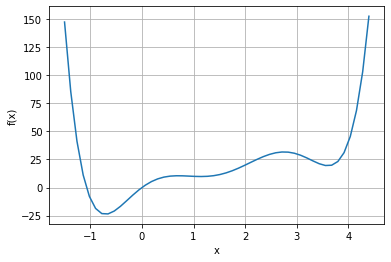

In [32]:
#define a non-convex function
f = lambda x : x*(x-1)*(x-2)*(x-3)*(x-4)*(x+1)+10*x

xx = np.linspace(-1.5,4.4)
plt.plot(xx,f(xx))
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

Non-convex function:
 x*(x - 4)*(x - 3)*(x - 2)*(x - 1)*(x + 1) + 10*x
Gradient (i.e., first derivative):
 x*(x - 4)*(x - 3)*(x - 2)*(x - 1) + x*(x - 4)*(x - 3)*(x - 2)*(x + 1) + x*(x - 4)*(x - 3)*(x - 1)*(x + 1) + x*(x - 4)*(x - 2)*(x - 1)*(x + 1) + x*(x - 3)*(x - 2)*(x - 1)*(x + 1) + (x - 4)*(x - 3)*(x - 2)*(x - 1)*(x + 1) + 10
[-6.00125000e+02 -4.35477908e+02 -3.03641767e+02 -1.99985383e+02
 -1.20295139e+02 -6.07567750e+01 -1.79371608e+01  1.12339238e+01
  2.94820127e+01  3.92061758e+01  4.24972418e+01  4.11560209e+01
  3.67115274e+01  3.04392025e+01  2.33791370e+01  1.63542937e+01
  9.98873029e+00  4.72582207e+00  8.46484492e-01 -1.51260407e+00
 -2.34077970e+00 -1.73517023e+00  1.17527402e-01  2.95926987e+00
  6.47889009e+00  1.03303200e+01  1.41508129e+01  1.75791669e+01
  2.02739464e+01  2.19317061e+01  2.23052125e+01  2.12216675e+01
  1.86009304e+01  1.44737410e+01  8.99994200e+00  2.48670197e+00
 -4.59326227e+00 -1.15834628e+01 -1.76254180e+01 -2.16404298e+01
 -2.23113610e+01 -

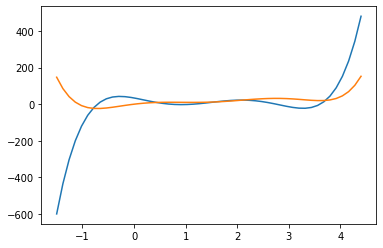

In [55]:
# define the function and differentiate it
# create a "symbol" called x
x = Symbol('x')
 
#Define function
fx = x*(x-1)*(x-2)*(x-3)*(x-4)*(x+1)+10*x
df = fx.diff(x)
print('Non-convex function:\n', fx)
print('Gradient (i.e., first derivative):\n',df)
 
fx = lambdify(x, fx)
df = lambdify(x, df)
print(df(xx))

plt.plot(xx, df(xx))
plt.plot(xx, fx(xx))

1.0981692106781793e-06
animation is ready


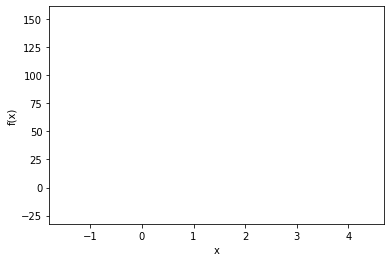

In [91]:
#Gradient desent
epochs = 100
eta = 0.001
bita = 0.0   #momentum term
x = random.uniform(-1.5,4.4)
print(x)
x = 4.3#-1.4
print(x)

plt.close('all')
fig = plt.figure()
#plt.plot(x, fx(x),'rs')
plt.xlabel('x')
plt.ylabel('f(x)')
camera = Camera(fig)
delta_x0 = 0
for i in range(epochs):
  plt.plot(x, fx(x),'go')
  plt.plot(xx, fx(xx), 'b-')
  camera.snap()
  
  #x += -eta * df(x);    #try: eta/(i+1)
  delta_x = eta * df(x) + bita * delta_x0 
  x =  x - delta_x
  delta_x0 = delta_x

  display.display(plt.gcf())
  display.clear_output(wait=True)
  sleep(0.8)
 
  if np.abs(df(x)) <= 10**-1:
    print(df(x))
    break

animation = camera.animate(blit=False)
animation.save('gradient_descent.mp4',fps=15)
print('animation is ready')

In [ ]:
ls

gradient_descent.mp4  sample_data/
